In [1]:
#-*-coding:utf-8-*-

%load_ext autoreload
%autoreload 2

import sys
import os

import numpy as np
import pandas as pd
from pandas.plotting import register_matplotlib_converters

import time
import datetime

import warnings

__ROOT_PATH = os.path.abspath('../')
sys.path.append(__ROOT_PATH)

from vol_surface_manager.kap_constants import *
from vol_surface_manager.kap_parse_args import parse_args
from vol_surface_manager.kap_logger import acquire_logger

from vol_surface_manager.kap_train import plot_loss_log_data, plot_candidate_log_data

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%matplotlib inline

from IPython.display import display, HTML, clear_output

matplotlib.rc('text', usetex = True)
matplotlib.rc('font', family = 'serif')

#tableau 정의

# These are the "Tableau 20" colors as RGB.
tableau10=[(31,119,180),(255,158,74),(103,191,92),(240,39,40),(176,139,201),
           (168,120,110),(237,151,202),(162,162,162),(205,204,93),(109,204,218)]
for i in range(len(tableau10)):
    r,g,b=tableau10[i]
    tableau10[i]=(r/255.,g/255.,b/255.)
plt.style.use(['fast'])

# ignore by message
warnings.filterwarnings("ignore", message="overflow encountered in square")
warnings.filterwarnings("ignore", message="overflow encountered in multiply")
warnings.filterwarnings("ignore", message="invalid value encountered in double_scalars")
warnings.filterwarnings("ignore", message="divide by zero encountered in double_scalars")
warnings.filterwarnings("ignore", message="invalid value encountered in true_divide")
warnings.filterwarnings("ignore", message="divide by zero encountered in true_divide")
warnings.filterwarnings("ignore", message="invalid value encountered in log")
warnings.filterwarnings("ignore", message="divide by zero encountered in log")
warnings.filterwarnings("ignore", message="invalid value encountered in less_equal")
warnings.filterwarnings("ignore", message="divide by zero encountered in less_equal")
warnings.filterwarnings("ignore", message="invalid value encountered in greater")
warnings.filterwarnings("ignore", message="divide by zero encountered in greater")
warnings.filterwarnings("ignore", message="invalid value encountered in sqrt")
warnings.filterwarnings("ignore", message="divide by zero encountered in sqrt")


#font_name = fm.FontProperties(fname=FONT_PATH).get_name()
#matplotlib.rc('font', family = font_name)
register_matplotlib_converters()
matplotlib.rcParams['figure.facecolor'] = 'w'

In [21]:
for DATA_TYPE in ["Kospi200", "S&P500"]:
    TRAIN_MODEL_TYPE = "Loss"
    #TRAIN_MODEL_TYPE = "Candidate"
    SAVE_FIGURES = False

    # 0. Parsing arguments
    sys.argv = ["kap_runme_plot_log.py",
                "--DATA_TYPE=%s" % DATA_TYPE,
                "--TRAIN_MODEL_TYPE=%s" % TRAIN_MODEL_TYPE,
                "--SAVE_FIGURES=%s" % str(SAVE_FIGURES)]
    _config = parse_args()

    if DATA_TYPE == "Kospi200":
        config_kospi200 = _config
    else:
        assert(DATA_TYPE == "S&P500")
        config_snp500 = _config

logger = acquire_logger(config_kospi200)
#FONT_BASE_DIR = os.path.join(config.DATA_BASE_DIR, 'font')
#assert(os.path.isdir(FONT_BASE_DIR))
#FONT_PATH = os.path.join(FONT_BASE_DIR, 'NanumGothicBold.ttf')
#assert(os.path.isfile(FONT_PATH))

In [22]:
for config in [config_kospi200, config_snp500]:
    logger.info('')
    logger.info('Considering %s index. Plotting log for %s model.' % (config.DATA_TYPE, config.TRAIN_MODEL_TYPE))

    _log_datas = []
    for i in range(3):
        alpha_log_data, rho_log_data, nu_log_data = None, None, None
        if i == 0:
            MODEL_BASE_DIR = '../models_transformer'
        elif i == 1:
            MODEL_BASE_DIR = '../models_cnn'
        elif i == 2:
            MODEL_BASE_DIR = '../models_mlp'
        for parameter in ['Alpha', 'Rho', 'Nu']:
            log_datetime = None
            if config.TRAIN_MODEL_TYPE == 'Loss':
                LOSS_MODEL_DIRNAME = 'loss_models'
                loss_model_base_dir = os.path.join(MODEL_BASE_DIR, LOSS_MODEL_DIRNAME)
                loss_model_base_dir_2 = os.path.join(loss_model_base_dir, config.DATA_TYPE)
                loss_model_save_dir = os.path.join(loss_model_base_dir_2, parameter)
                LOG_DIRNAME = 'logs'
                loss_model_log_dir = os.path.join(loss_model_save_dir, LOG_DIRNAME)

                if config.DATA_TYPE == 'Kospi200':
                    if parameter == 'Alpha':
                        #log_datetime = '20190920153952'
                        if i == 0:
                            #log_datetime = '20200430150128'
                            log_datetime = '20200526185610'
                        elif i == 1:
                            #log_datetime = '20200503031136'
                            log_datetime = '20200601160946'
                        elif i == 2:
                            #log_datetime = '20200518145305'
                            log_datetime = '20200531042143'
                    elif parameter == 'Rho':
                        #log_datetime = '20190920214916'
                        if i == 0:
                            #log_datetime = '20200506050606'
                            log_datetime = '20200526185613'
                        elif i == 1:
                            #log_datetime = '20200504021704'
                            log_datetime = '20200601172456'
                        elif i == 2:
                            #log_datetime = '20200518145446'
                            log_datetime = '20200531042152'
                    else:
                        assert(parameter == 'Nu')
                        #log_datetime = '20190920154024'
                        if i == 0:
                            #log_datetime = '20200501041945'
                            log_datetime = '20200526185615'
                        elif i == 1:
                            #log_datetime = '20200503124913'
                            log_datetime = '20200601172506'
                        elif i == 2:
                            #log_datetime = '20200518145538'
                            log_datetime = '20200531042201'
                elif config.DATA_TYPE == 'S&P500':
                    if parameter == 'Alpha':
                        #log_datetime = '20190920060516'
                        if i == 0:
                            #log_datetime = '20200501123903'
                            log_datetime = '20200529135146'
                        elif i == 1:
                            #log_datetime = '20200524073537'
                            log_datetime = '20200601173515'
                        elif i == 2:
                            #log_datetime = '20200518145654'
                            log_datetime = '20200531042117'
                    elif parameter == 'Rho':
                        #log_datetime = '20190920060559'
                        if i == 0:
                            #log_datetime = '20200524073540'
                            log_datetime = '20200529135157'
                        elif i == 1:
                            #log_datetime = '20200504204441'
                            log_datetime = '20200601173444'
                        elif i == 2:
                            #log_datetime = '20200518145735'
                            log_datetime = '20200531042126'
                    else:
                        assert(parameter == 'Nu')
                        #log_datetime = '20190920060622'
                        if i == 0:
                            #log_datetime = '20200524073544'
                            log_datetime = '20200529135206'
                        elif i == 1:
                            #log_datetime = '20200505004746'
                            log_datetime = '20200601173440'
                        elif i == 2:
                            #log_datetime = '20200518145826'
                            log_datetime = '20200531042134'

                log_path = os.path.join(loss_model_log_dir, 'training_log_%s.csv' % log_datetime)

            else:
                assert(config.TRAIN_MODEL_TYPE == 'Candidate')

                CANDIDATE_MODEL_DIRNAME = 'candidate_models'
                candidate_model_base_dir = os.path.join(MODEL_BASE_DIR, CANDIDATE_MODEL_DIRNAME)
                candidate_model_base_dir_2 = os.path.join(candidate_model_base_dir, config.DATA_TYPE)
                candidate_model_save_dir = os.path.join(candidate_model_base_dir_2, parameter)
                LOG_DIRNAME = 'logs'
                candidate_model_log_dir = os.path.join(candidate_model_save_dir, LOG_DIRNAME)

                if config.DATA_TYPE == 'Kospi200':
                    if parameter == 'Alpha':
                        #log_datetime = '20190920054013'
                        if i == 0:
                            #log_datetime = '20200506033148'
                            log_datetime = '20200526180841'
                        elif i == 1:
                            #log_datetime = '20200505140727'
                            log_datetime = '20200527185122'
                        elif i == 2:
                            #log_datetime = '20200519192420'
                            log_datetime = '20200531033922'
                    elif parameter == 'Rho':
                        #log_datetime = '20190920054005'
                        if i == 0:
                            #log_datetime = '20200506033739'
                            log_datetime = '20200526160243'
                        elif i == 1:
                            #log_datetime = '20200505153725'
                            log_datetime = '20200527193744'
                        elif i == 2:
                            #log_datetime = '20200519192411'
                            log_datetime = '20200531033931'
                    else:
                        assert(parameter == 'Nu')
                        #log_datetime = '20190920054008'
                        if i == 0:
                            #log_datetime = '20200506035030'
                            log_datetime = '20200526143932'
                        elif i == 1:
                            #log_datetime = '20200505163310'
                            log_datetime = '20200527203909'
                        elif i == 2:
                            #log_datetime = '20200519192405'
                            log_datetime = '20200531033952'
                elif config.DATA_TYPE == 'S&P500':
                    if parameter == 'Alpha':
                        #log_datetime = '20190921110703'
                        if i == 0:
                            #log_datetime = '20200521182934'
                            log_datetime = '20200529124553'
                        elif i == 1:
                            #log_datetime = '20200505190636'
                            log_datetime = '20200601035544'
                        elif i == 2:
                            #log_datetime = '20200519192358'
                            log_datetime = '20200531033723'
                    elif parameter == 'Rho':
                        #log_datetime = '20190920225213'
                        if i == 0:
                            #log_datetime = '20200527184812'
                            log_datetime = '20200529124550'
                        elif i == 1:
                            #log_datetime = '20200505232101'
                            log_datetime = '20200601051947'
                        elif i == 2:
                            #log_datetime = '20200519192346'
                            log_datetime = '20200531033807'
                    else:
                        assert(parameter == 'Nu')
                        #log_datetime = '20190921074539'
                        if i == 0:
                            #log_datetime = '20200521132759'
                            log_datetime = '20200529124546'
                        elif i == 1:
                            #log_datetime = '20200506003355'
                            log_datetime = '20200601143302'
                        elif i == 2:
                            #log_datetime = '20200519192338'
                            log_datetime = '20200531033839'

                log_path = os.path.join(candidate_model_log_dir, 'training_log_%s.csv' % log_datetime)

            try:
                log_data = pd.read_csv(log_path)
                logger.info('Log data for parameter %s is loaded from path "%s".' % (parameter, log_path))
            except Exception as e:
                logger.fatal('Cannot load log data for parameter %s from path "%s".' % (parameter, log_path))
                raise e

            if parameter == 'Alpha':
                alpha_log_data = log_data
            elif parameter == 'Rho':
                rho_log_data = log_data
            else:
                assert(parameter == 'Nu')
                nu_log_data = log_data
        _log_datas.append((alpha_log_data, rho_log_data, nu_log_data))
    _log_datas = list(zip(*_log_datas))
    if config.DATA_TYPE == "Kospi200":
        log_datas_kospi200 = _log_datas
    else:
        assert(config.DATA_TYPE == "S&P500")
        log_datas_snp500 = _log_datas

    INFO - 
    INFO - Considering Kospi200 index. Plotting log for Loss model.
    INFO - Log data for parameter Alpha is loaded from path "../models_transformer/loss_models/Kospi200/Alpha/logs/training_log_20200526185610.csv".
    INFO - Log data for parameter Rho is loaded from path "../models_transformer/loss_models/Kospi200/Rho/logs/training_log_20200526185613.csv".
    INFO - Log data for parameter Nu is loaded from path "../models_transformer/loss_models/Kospi200/Nu/logs/training_log_20200526185615.csv".
    INFO - Log data for parameter Alpha is loaded from path "../models_cnn/loss_models/Kospi200/Alpha/logs/training_log_20200601160946.csv".
    INFO - Log data for parameter Rho is loaded from path "../models_cnn/loss_models/Kospi200/Rho/logs/training_log_20200601172456.csv".
    INFO - Log data for parameter Nu is loaded from path "../models_cnn/loss_models/Kospi200/Nu/logs/training_log_20200601172506.csv".
    INFO - Log data for parameter Alpha is loaded from path "../models

    INFO - Now plotting the log file.


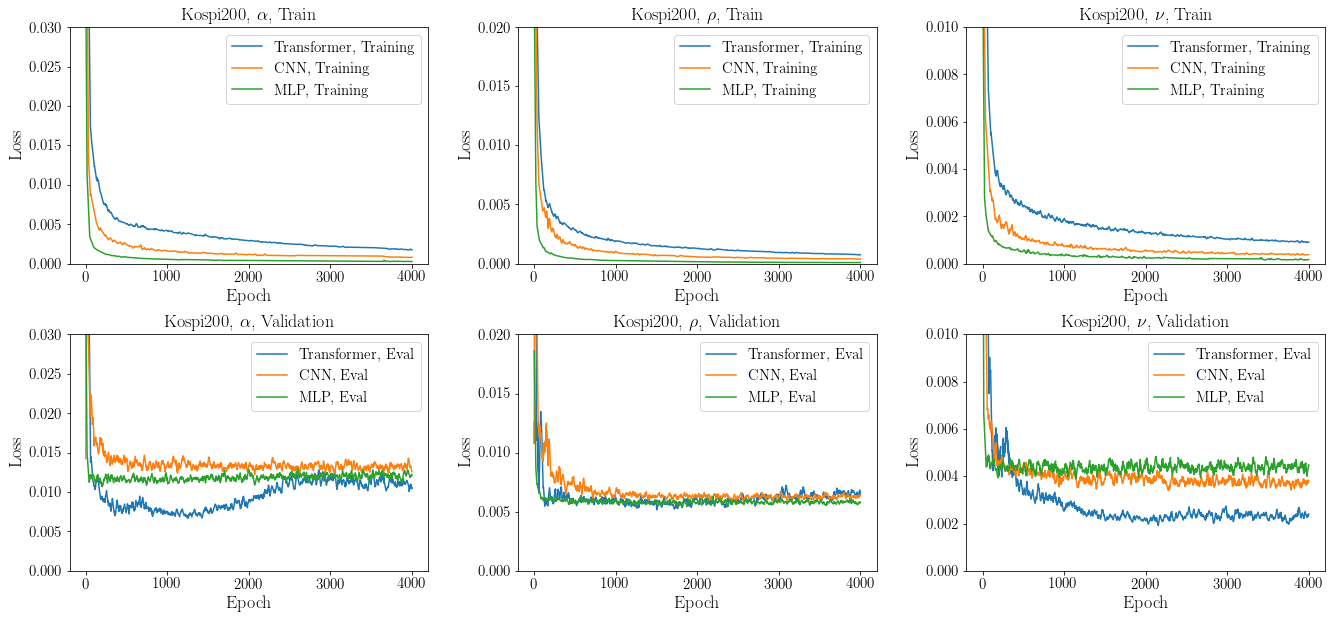

    INFO - 
    INFO - Now plotting the log file.


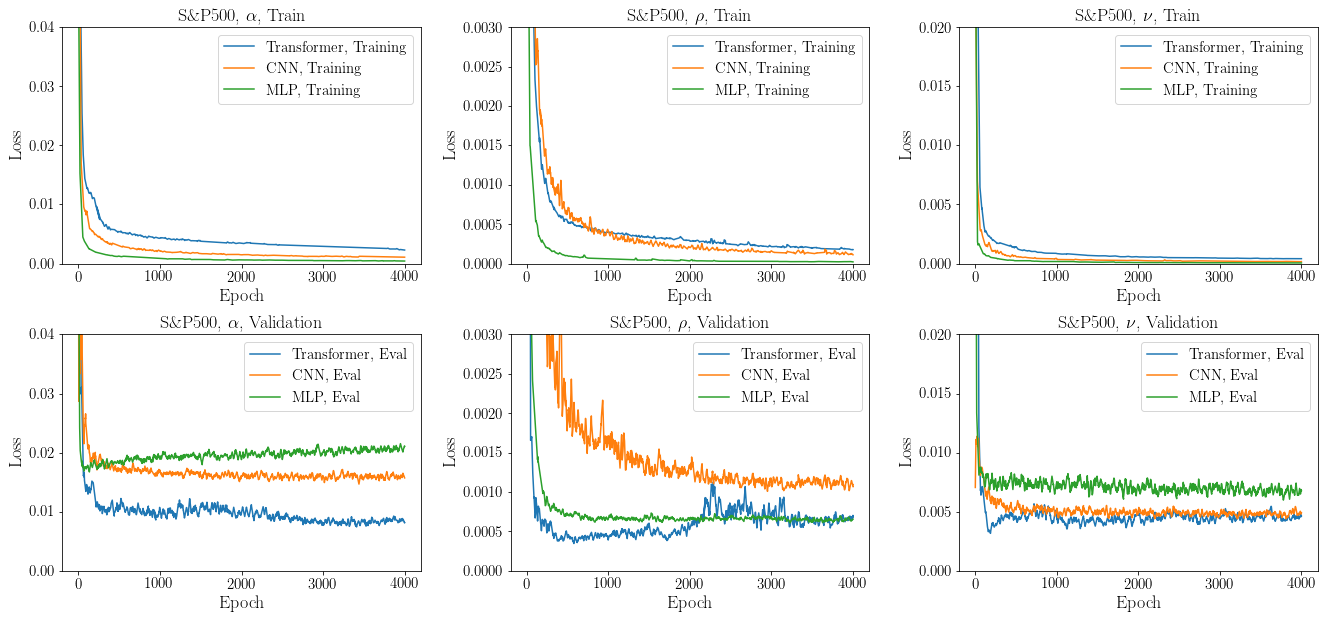

    INFO - 


In [23]:
for config, log_datas in [(config_kospi200, log_datas_kospi200), (config_snp500, log_datas_snp500)]:
    # 2. Plot log file
    plot_result = True

    try:
        assert(os.path.isdir(config.RESULT_BASE_DIR))
    except Exception as e:
        logger.fatal('Invalid result directory: "%s."' % config.RESULT_BASE_DIR)
        raise e
    logger.info('Now plotting the log file.')

    parameters = ['Alpha', 'Rho', 'Nu']
    model_names = ['Transformer', 'CNN', 'MLP']

    if config.TRAIN_MODEL_TYPE == 'Loss':
        if config.DATA_TYPE == 'Kospi200':
            ylims = [(0, 0.03), (0, 0.02), (0, 0.01)]
            save_path = os.path.join(config.RESULT_BASE_DIR, 'CSM_train_loss_K.pdf')
        elif config.DATA_TYPE == 'S&P500':
            ylims = [(0, 0.04), (0, 0.003), (0, 0.02)]
            save_path = os.path.join(config.RESULT_BASE_DIR, 'CSM_train_loss.pdf')
        #save_path = os.path.join(config.RESULT_BASE_DIR, 'loss_model_log_graph_%s_%s.png' % (
        #    config.DATA_TYPE, config.TRAIN_PARAMETER_TYPE))
        plot_loss_log_data(config, log_datas, save_path, plot_result, parameter=parameters, model_names=model_names, ylim=ylims)
        #plot_loss_log_data(config, log_data, save_path, plot_result, parameter=config.TRAIN_PARAMETER_TYPE)
    else:
        assert(config.TRAIN_MODEL_TYPE == 'Candidate')
        if config.DATA_TYPE == 'Kospi200':
            ylims = [(0, 2.), (0, 3.), (0, 2.)]
            save_path = os.path.join(config.RESULT_BASE_DIR, 'SSM_train_loss_K.pdf')
        elif config.DATA_TYPE == 'S&P500':
            ylims = [(0, 1.), (0., 3.), (0., 1.6)]
            save_path = os.path.join(config.RESULT_BASE_DIR, 'SSM_train_loss.pdf')
        plot_candidate_log_data(config, log_datas, save_path, plot_result, parameter=parameters, model_names=model_names, ylim=ylims)
        #plot_candidate_log_data(config, log_data, save_path, plot_result, parameter=config.TRAIN_PARAMETER_TYPE)
    logger.info('')